In [1]:
!pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

# 엑셀 파일을 읽기
file_path = "node_distinct.xlsx"  # 엑셀 파일의 경로를 지정하세요.
df = pd.read_excel(file_path)  # 엑셀 파일을 데이터프레임으로 읽기

# 중복된 개수를 계산하여 '중복' 열에 추가
df["중복"] = df.apply(lambda row: df[df.columns[0]].value_counts()[row[df.columns[0]]], axis=1)

# 중복을 제거한 후, 첫 번째 값만 유지
df_unique = df.drop_duplicates(subset=df.columns[0])  # 첫 번째 열의 중복 제거

# 새로운 엑셀 파일에 결과를 저장
output_path = "output2.xlsx"  # 결과를 저장할 파일의 경로를 지정하세요.
df_unique.to_excel(output_path, index=False)  # 인덱스 없이 저장

print("결과가 저장되었습니다:", output_path)


결과가 저장되었습니다: output2.xlsx


In [8]:
import pandas as pd

# 엑셀 파일을 읽기
file_path = "node_distinct.xlsx"  # 엑셀 파일의 경로를 지정하세요.
df = pd.read_excel(file_path)  # 엑셀 파일을 데이터프레임으로 읽기

# 데이터프레임에서 각 행이 몇 번 나타나는지 계산
# 먼저 데이터프레임의 각 행을 튜플로 변환한 다음, 이 튜플에 대한 중복된 횟수를 계산
df['중복'] = df.apply(lambda row: tuple(row), axis=1)  # 행을 튜플로 변환
df['중복_횟수'] = df['중복'].map(df['중복'].value_counts())  # 중복된 횟수 추가

# 중복된 행을 제거하고, '중복_횟수' 열을 유지
df_unique = df.drop_duplicates(subset=df.columns[:-2])  # 중복된 행 제거
df_unique = df_unique.drop(columns=['중복'])  # '중복' 열 삭제

# 결과를 엑셀 파일로 저장
output_path = "output3.xlsx"  # 결과를 저장할 파일의 경로
df_unique.to_excel(output_path, index=False)

print("결과가 저장되었습니다:", output_path)


결과가 저장되었습니다: output3.xlsx


In [9]:
pip install networkx matplotlib


Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 엑셀 파일에서 데이터 읽기
file_path = "node_matrix.xlsx"  # 엑셀 파일 경로를 지정하세요
df = pd.read_excel(file_path, index_col=0)  # 첫 번째 열을 인덱스로 사용

# 네트워크 그래프 생성
G = nx.Graph()

# 데이터프레임의 인덱스를 노드로 추가
nodes = df.index.tolist()
G.add_nodes_from(nodes)

# 행렬을 기반으로 엣지 추가
for i, row in df.iterrows():
    for j, value in row.iteritems():
        if value > 0:  # 값이 0보다 클 때만 엣지 추가
            G.add_edge(i, j, weight=value)  # 엣지에 가중치 부여

# 네트워크 그래프 시각화
pos = nx.spring_layout(G)  # 스프링 레이아웃 사용
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=700,
    node_color="skyblue",
    edge_color="gray",
    linewidths=1.5,
    font_size=12,
    font_weight="bold",
)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(i, j): f"{data['weight']}" for i, j, data in G.edges(data=True)}
)
plt.title("네트워크 그래프")
plt.show()


AttributeError: 'Series' object has no attribute 'iteritems'

C:\Users\wogh2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45348 (\N{HANGUL SYLLABLE NE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wogh2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wogh2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wogh2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wogh2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wogh2\anaconda3\L

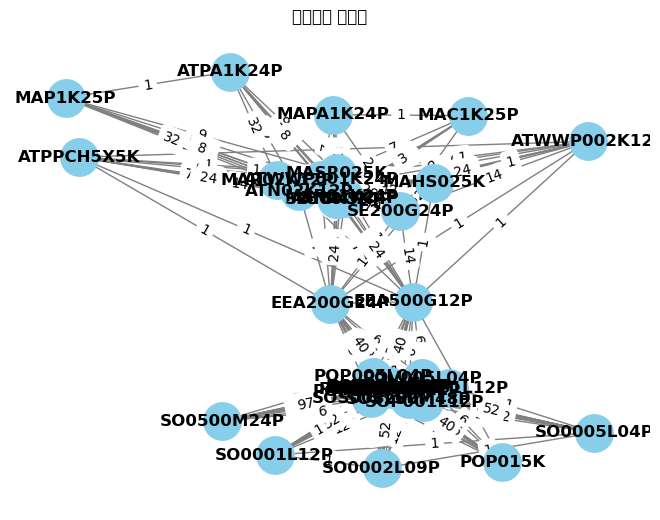

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 엑셀 파일에서 행렬 데이터 읽기
file_path = "updated_matrix.xlsx"  # 엑셀 파일 경로를 지정하세요
df = pd.read_excel(file_path, index_col=0)  # 첫 번째 열을 인덱스로 사용

# 네트워크 그래프 생성
G = nx.Graph()

# 데이터프레임의 인덱스와 열 이름을 노드로 사용
nodes = df.index.tolist()  # 행 이름
columns = df.columns.tolist()  # 열 이름

# 행렬에서 노드와 엣지 추가
for row_name in nodes:
    for col_name in columns:
        value = df.at[row_name, col_name]  # 값 가져오기
        if value > 0:  # 값이 0보다 클 때 엣지 추가
            G.add_edge(row_name, col_name, weight=value)  # 엣지에 가중치 부여

# 네트워크 그래프 시각화
pos = nx.spring_layout(G)  # 스프링 레이아웃 사용
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=700,
    node_color="skyblue",
    edge_color="gray",
    linewidths=1.5,
    font_size=12,
    font_weight="bold",
)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(i, j): f"{data['weight']}" for i, j, data in G.edges(data=True)}
)
plt.title("네트워크 그래프")
plt.show()


In [37]:
import pandas as pd
import numpy as np

# 엑셀 파일에서 행렬 읽기
file_path = "node1_matrix.xlsx"  # 엑셀 파일 경로를 지정하세요
df = pd.read_excel(file_path, index_col=0)  # 첫 번째 열을 인덱스로 사용

# 행렬의 주대각선 아래의 모든 값을 0으로 설정
# np.tril_indices_from를 사용하여 주대각선 아래의 인덱스를 가져옵니다.
rows, cols = np.tril_indices_from(df)  # 주대각선 포함 아래쪽 삼각형 부분의 인덱스
df.values[rows, cols] = 0  # 주대각선 아래의 모든 값을 0으로 설정

# 결과를 엑셀 파일에 저장
output_path = "new_matrix.xlsx"  # 결과를 저장할 파일 경로를 지정하세요
df.to_excel(output_path)

print("주대각선 아래의 모든 값이 0으로 설정되었습니다. 결과가 저장되었습니다:", output_path)


주대각선 아래의 모든 값이 0으로 설정되었습니다. 결과가 저장되었습니다: new_matrix.xlsx


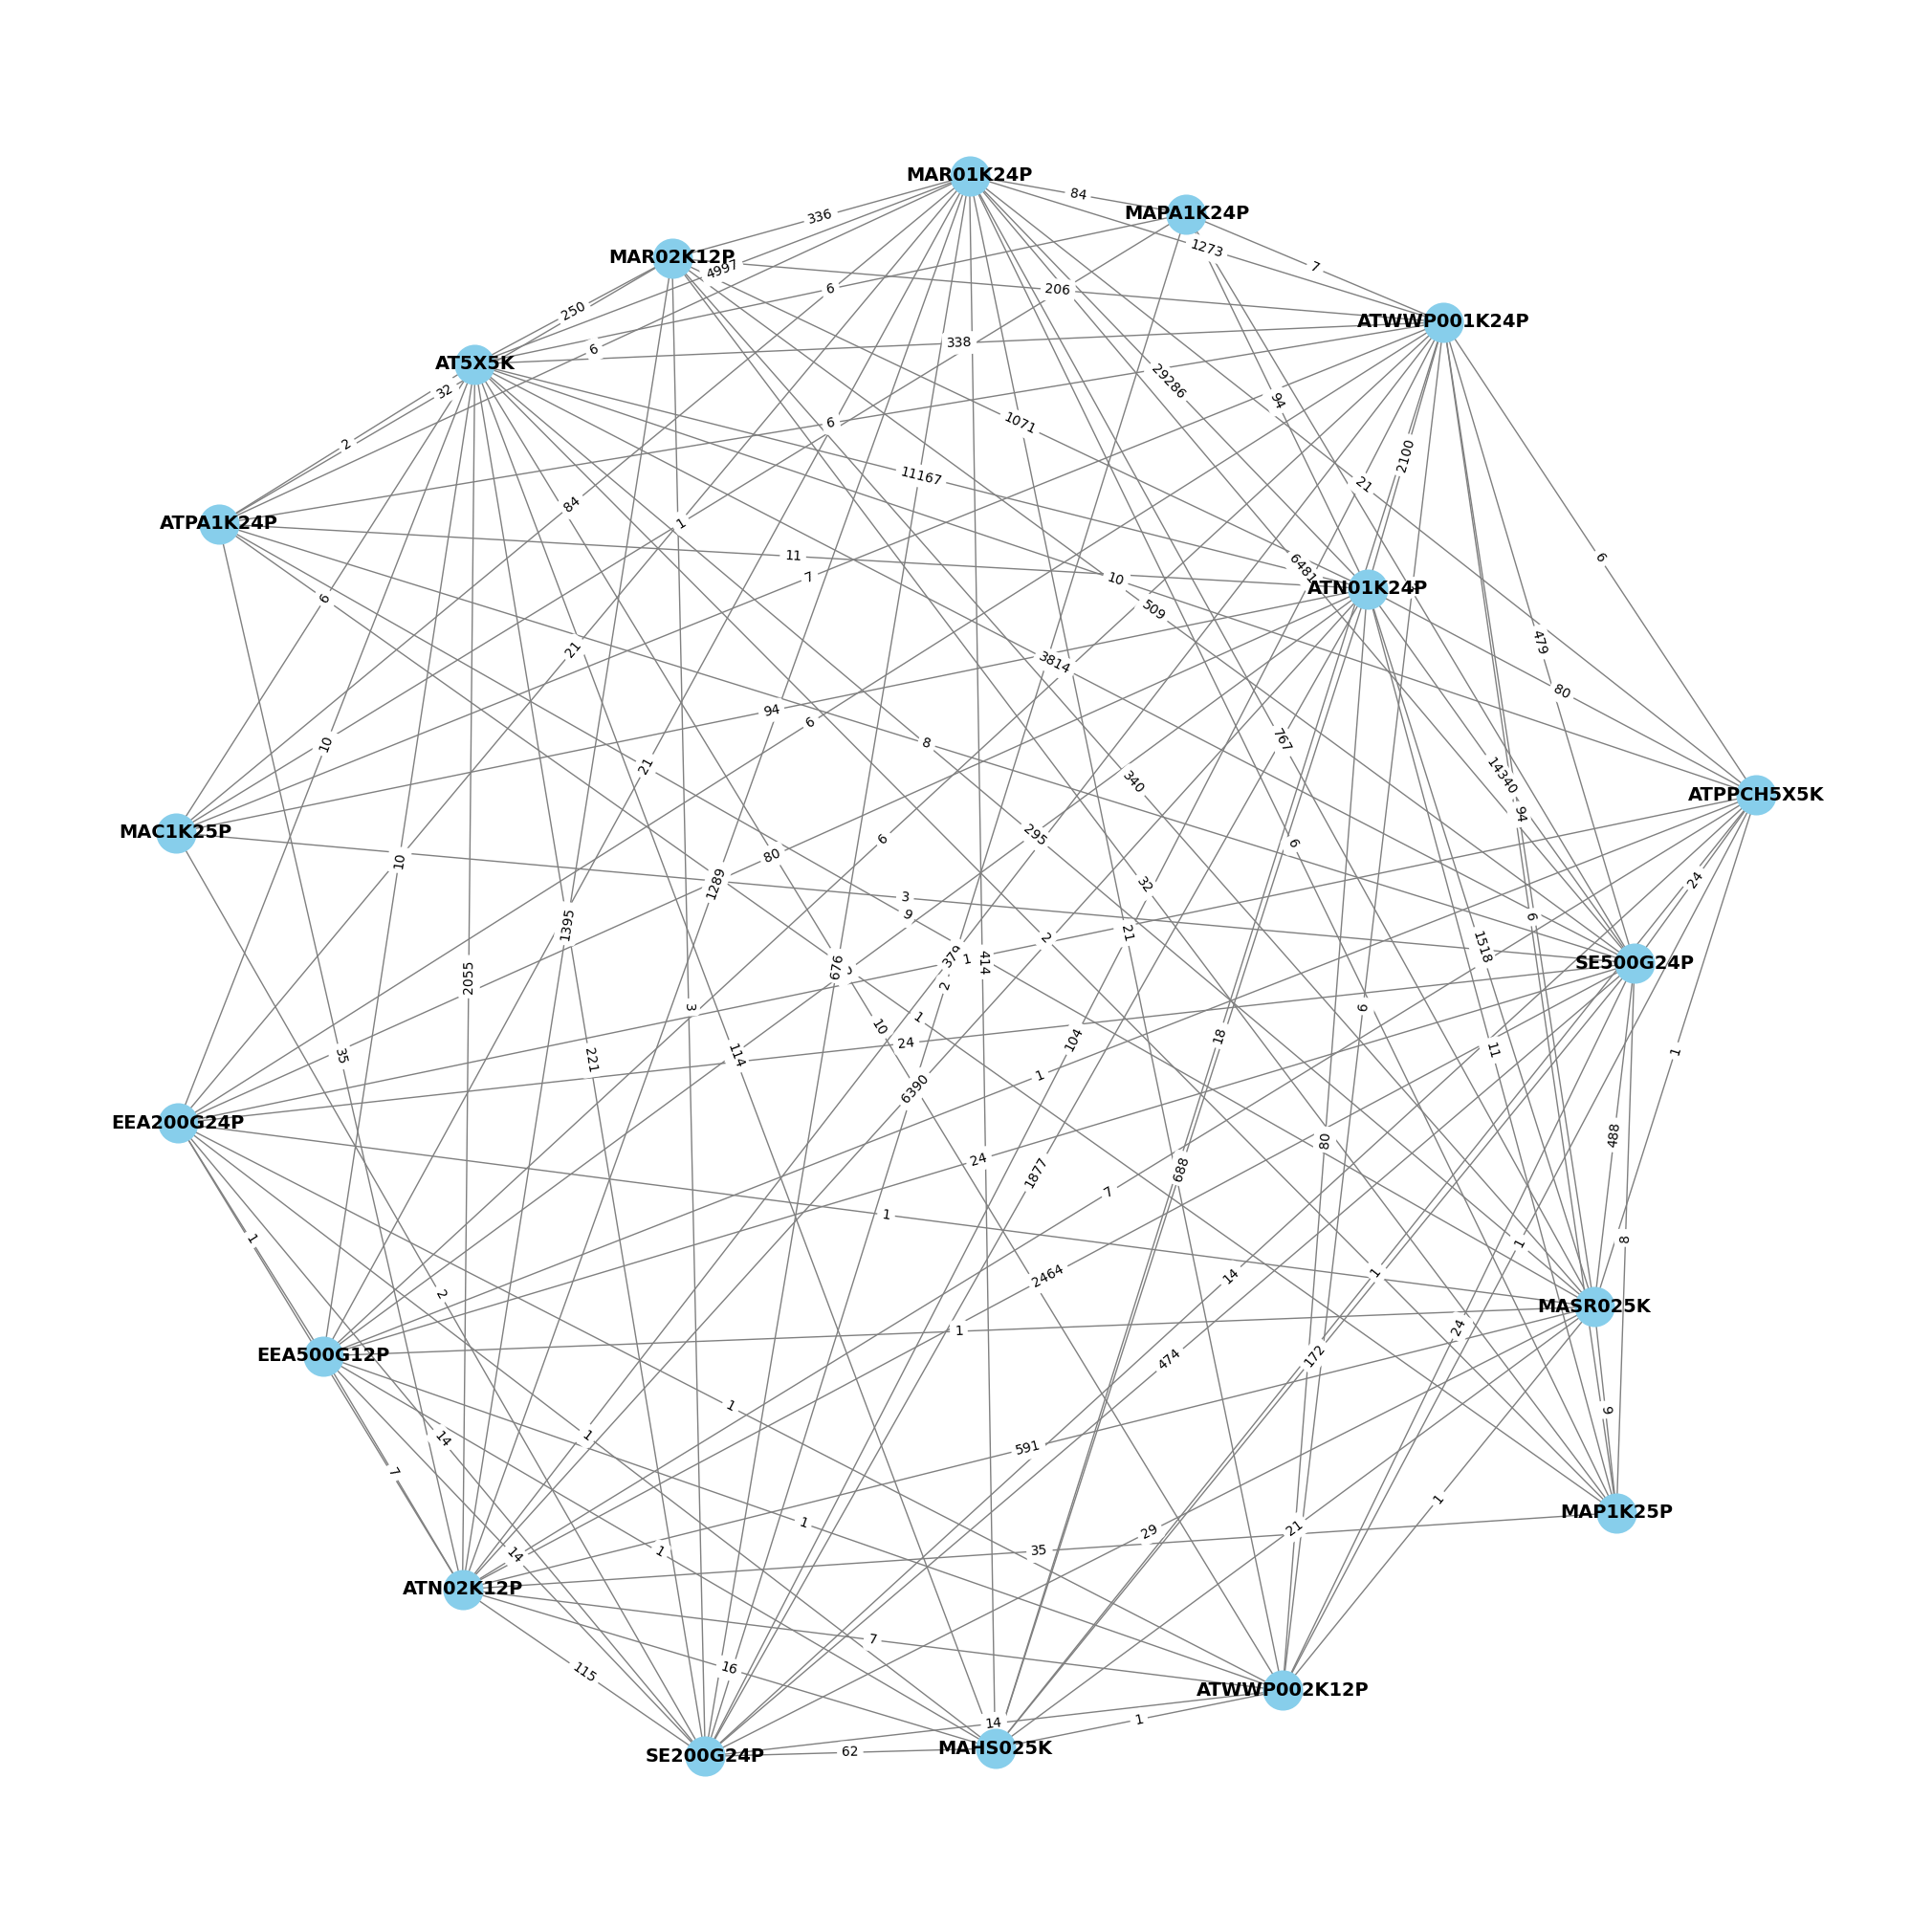

네트워크 그래프가 저장되었습니다: network_graph.png


In [43]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 엑셀 파일에서 행렬 데이터 읽기
file_path = "new_matrix.xlsx"  # 엑셀 파일 경로를 지정하세요
df = pd.read_excel(file_path, index_col=0)  # 첫 번째 열을 인덱스로 사용

# 네트워크 그래프 생성
G = nx.Graph()

# 행렬에서 노드와 엣지 추가
for row_name in df.index:  # 행을 노드로 사용
    for col_name in df.columns:  # 열을 노드로 사용
        value = df.at[row_name, col_name]
        if value >= 1:  # 값이 30 이상이면 엣지를 추가
            G.add_edge(row_name, col_name, weight=value)  # 엣지에 가중치 부여

# 네트워크 그래프 시각화
plt.figure(figsize=(20,20))  # 그래프 크기를 크게 설정
pos = nx.spring_layout(G, k=50.0, iterations=50)  # 노드 간의 거리를 조정하여 겹침을 줄임

# 노드 및 엣지 그리기
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=800,
    node_color="skyblue",
    edge_color="gray",
    linewidths=2,
    font_size=14,
    font_weight="bold",
)
# 엣지 레이블 추가
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(i, j): data["weight"] for i, j, data in G.edges(data=True)}
)

# 그래프를 이미지로 저장
output_path = "network_graph.png"  # 저장할 파일 경로
plt.savefig(output_path, format="png", dpi=300)  # 고해상도로 저장

plt.show()  # 그래프를 화면에 표시

print("네트워크 그래프가 저장되었습니다:", output_path)


In [21]:
# 필요한 라이브러리 설치
pip install pandas networkx matplotlib openpyxl


SyntaxError: invalid syntax (1538193872.py, line 2)

# 1910 공정 없애기

In [44]:
import pandas as pd
import numpy as np

# 엑셀 파일에서 행렬 읽기
file_path = "1910_remove_matrix.xlsx"  # 엑셀 파일 경로를 지정하세요
df = pd.read_excel(file_path, index_col=0)  # 첫 번째 열을 인덱스로 사용

# 행렬의 주대각선 아래의 모든 값을 0으로 설정
# np.tril_indices_from를 사용하여 주대각선 아래의 인덱스를 가져옵니다.
rows, cols = np.tril_indices_from(df)  # 주대각선 포함 아래쪽 삼각형 부분의 인덱스
df.values[rows, cols] = 0  # 주대각선 아래의 모든 값을 0으로 설정

# 결과를 엑셀 파일에 저장
output_path = "new_1_matrix.xlsx"  # 결과를 저장할 파일 경로를 지정하세요
df.to_excel(output_path)

print("주대각선 아래의 모든 값이 0으로 설정되었습니다. 결과가 저장되었습니다:", output_path)


주대각선 아래의 모든 값이 0으로 설정되었습니다. 결과가 저장되었습니다: new_1_matrix.xlsx


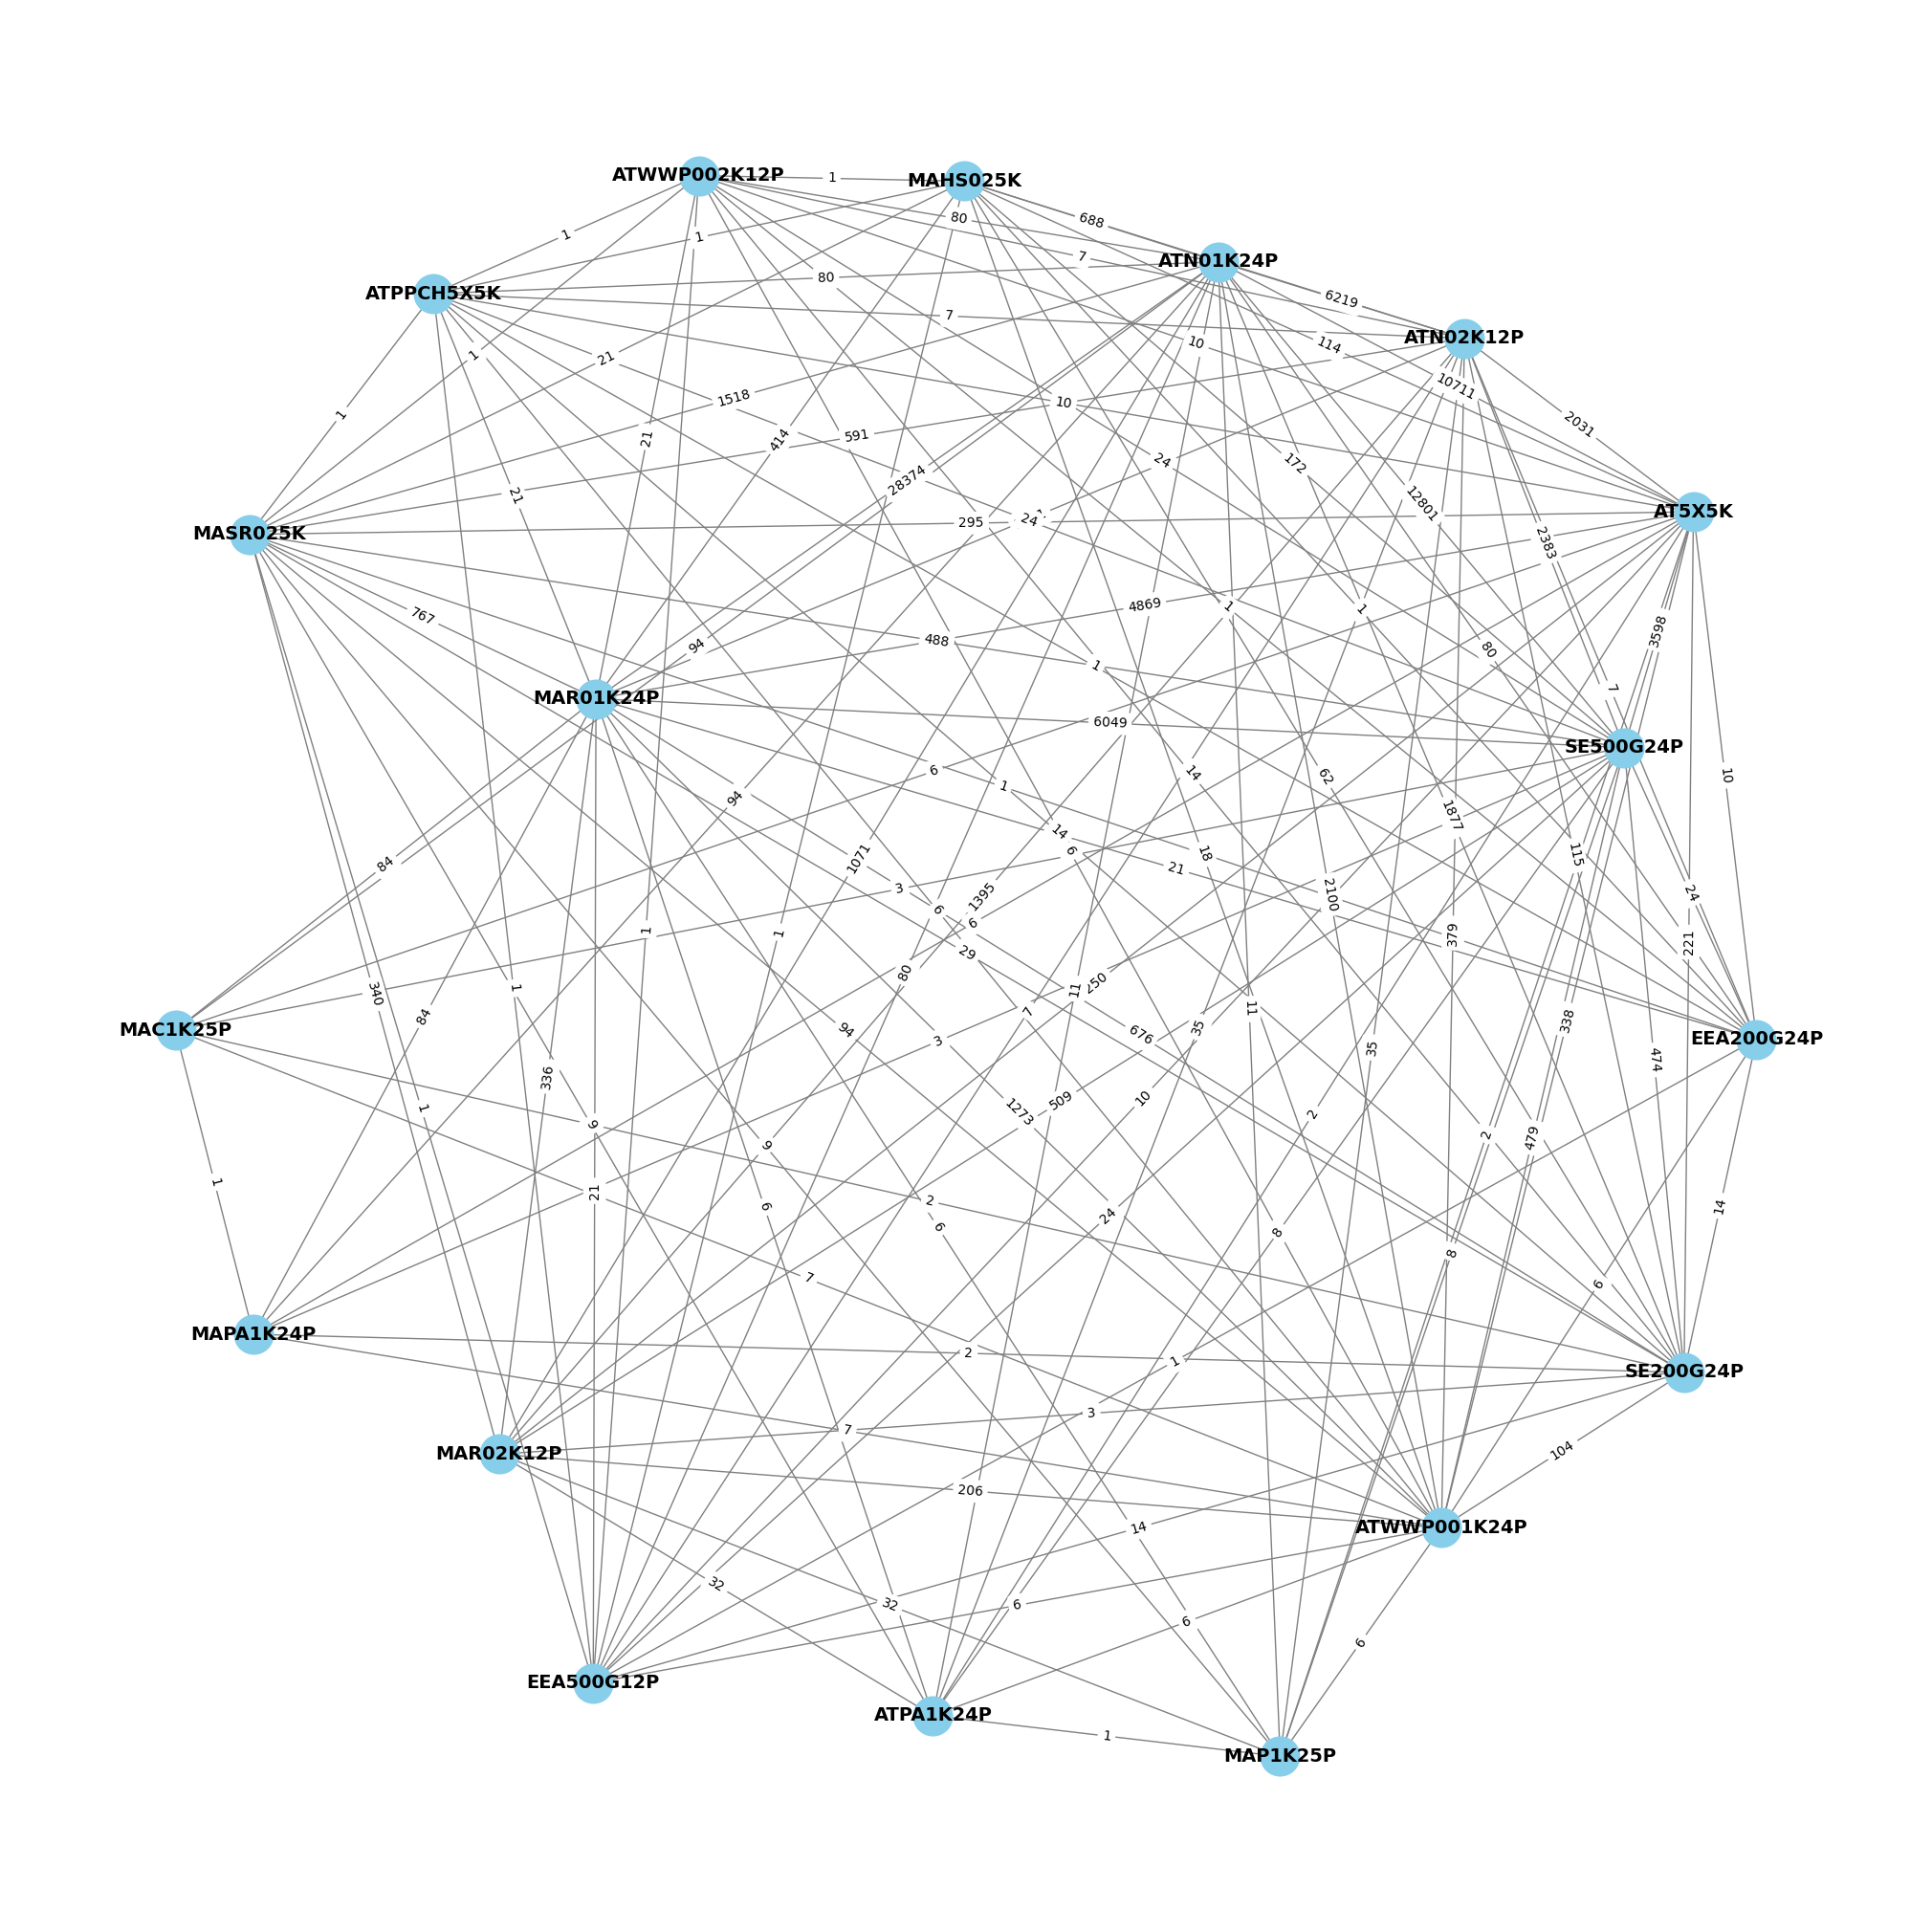

네트워크 그래프가 저장되었습니다: network_graph_1916.png


In [45]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 엑셀 파일에서 행렬 데이터 읽기
file_path = "new_1_matrix.xlsx"  # 엑셀 파일 경로를 지정하세요
df = pd.read_excel(file_path, index_col=0)  # 첫 번째 열을 인덱스로 사용

# 네트워크 그래프 생성
G = nx.Graph()

# 행렬에서 노드와 엣지 추가
for row_name in df.index:  # 행을 노드로 사용
    for col_name in df.columns:  # 열을 노드로 사용
        value = df.at[row_name, col_name]
        if value >= 1:  # 값이 30 이상이면 엣지를 추가
            G.add_edge(row_name, col_name, weight=value)  # 엣지에 가중치 부여

# 네트워크 그래프 시각화
plt.figure(figsize=(20,20))  # 그래프 크기를 크게 설정
pos = nx.spring_layout(G, k=50.0, iterations=50)  # 노드 간의 거리를 조정하여 겹침을 줄임

# 노드 및 엣지 그리기
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=800,
    node_color="skyblue",
    edge_color="gray",
    linewidths=2,
    font_size=14,
    font_weight="bold",
)
# 엣지 레이블 추가
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(i, j): data["weight"] for i, j, data in G.edges(data=True)}
)

# 그래프를 이미지로 저장
output_path = "network_graph_1916.png"  # 저장할 파일 경로
plt.savefig(output_path, format="png", dpi=300)  # 고해상도로 저장

plt.show()  # 그래프를 화면에 표시

print("네트워크 그래프가 저장되었습니다:", output_path)
